# Haleema Sadia

# Task 3 Music Recommendation

# LGMVIP Data Science Internship  #JULY

# Problem Statement : Predict Wether a user will re-listen to a song or not

## Dataset link: https://www.kaggle.com/competitions/kkbox-music-recommendation-challenge/data

In [1]:
#import all libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from scipy import stats

In [2]:
#load data
path = "C:\\Users\\92336\\LGMVIP\\BEGINNER-TASKS\\Music Recommendation Problem\\"
train_data = pd.read_csv(path+"train.csv")
test_data = pd.read_csv(path+"test.csv")
members_data = pd.read_csv(path+"members.csv")
songs_data = pd.read_csv(path+"songs.csv")
songs_info_data = pd.read_csv(path+"song_extra_info.csv")



## Information About Dataset

In [3]:
train_data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [4]:
test_data.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [5]:
songs_data.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [6]:
members_data.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [7]:
songs_info_data.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


## Merging Data

In [8]:
data = pd.merge(train_data,members_data)
df = pd.merge(songs_data,songs_info_data)
data = pd.merge(data,df)


## Information

In [9]:
data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
1,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,15,18,male,4,20151220,20170930,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
2,xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1,1,0,NaN,7,20120804,20171004,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
3,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1,5,21,female,9,20110808,20170917,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
4,Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,0,6,33,female,9,20070323,20170915,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854


In [10]:
data.shape

(7375849, 20)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7375849 entries, 0 to 7375848
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   city                    int64  
 7   bd                      int64  
 8   gender                  object 
 9   registered_via          int64  
 10  registration_init_time  int64  
 11  expiration_date         int64  
 12  song_length             int64  
 13  genre_ids               object 
 14  artist_name             object 
 15  composer                object 
 16  lyricist                object 
 17  language                float64
 18  name                    object 
 19  isrc                    object 
dtypes: float64(1), int64(7), object(12)
memory usage: 1.2+ GB


In [12]:
data.describe()

,target,city,bd,registered_via,registration_init_time,expiration_date,song_length,language
count,7.375849e+06,7.375849e+06,7.375849e+06,7.375849e+06,7.375849e+06,7.375849e+06,7.375849e+06,7.375813e+06
mean,5.035420e-01,7.511470e+00,1.753920e+01,6.794075e+00,2.012810e+07,2.017157e+07,2.451213e+05,1.860810e+01
std,4.999875e-01,6.641632e+00,2.155224e+01,2.275785e+00,3.017261e+04,3.869916e+03,6.734491e+04,2.117688e+01
min,0.000000e+00,1.000000e+00,-4.300000e+01,3.000000e+00,2.004033e+07,1.970010e+07,1.393000e+03,-1.000000e+00
25%,0.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,2.011070e+07,2.017091e+07,2.147260e+05,3.000000e+00
50%,1.000000e+00,5.000000e+00,2.100000e+01,7.000000e+00,2.013102e+07,2.017093e+07,2.418120e+05,3.000000e+00
75%,1.000000e+00,1.300000e+01,2.900000e+01,9.000000e+00,2.015102e+07,2.017101e+07,2.721690e+05,5.200000e+01
max,1.000000e+00,2.200000e+01,1.051000e+03,1.300000e+01,2.017013e+07,2.020102e+07,1.085171e+07,5.900000e+01


# Missing Value Problem

In [13]:
data.isnull().sum()

msno                            0
song_id                         0
source_system_tab           24843
source_screen_name         414701
source_type                 21535
target                          0
city                            0
bd                              0
gender                    2960803
registered_via                  0
registration_init_time          0
expiration_date                 0
song_length                     0
genre_ids                  118337
artist_name                     0
composer                  1675125
lyricist                  3177973
language                       36
name                            2
isrc                       576394
dtype: int64

In [14]:
#percent of missing value in each coloumn
print("Percentage of Missing values for each coloumn")
percent_missing = data.isnull().sum() * 100 / len(data)
print(percent_missing)

Percentage of Missing values for each coloumn
msno                       0.000000
song_id                    0.000000
source_system_tab          0.336815
source_screen_name         5.622417
source_type                0.291966
target                     0.000000
city                       0.000000
bd                         0.000000
gender                    40.141860
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
song_length                0.000000
genre_ids                  1.604385
artist_name                0.000000
composer                  22.710945
lyricist                  43.086199
language                   0.000488
name                       0.000027
isrc                       7.814612
dtype: float64


## Removing rows with missing values from coloumns Having less then 1% of missing value

In [15]:
#removing missing value from coloumns having less than 1%
data = data[(data.name.notna()) & (data.language.notna()) & (data.source_type.notna()) & (data.source_system_tab.notna())]

In [16]:
data.isnull().sum()

msno                            0
song_id                         0
source_system_tab               0
source_screen_name         389837
source_type                     0
target                          0
city                            0
bd                              0
gender                    2950908
registered_via                  0
registration_init_time          0
expiration_date                 0
song_length                     0
genre_ids                  117911
artist_name                     0
composer                  1669225
lyricist                  3166649
language                        0
name                            0
isrc                       574302
dtype: int64

## imputing genre_ids coloumn using LOCF Method

In [17]:
#imputing genre_ids coloumn on the basis of Last observation carried forward (LOCF) method.
data["genre_ids"] = data["genre_ids"].fillna(method='ffill')

## imputing remaining coloumns with the unknown value

In [18]:
#imputing unknown value for rest of the missing values in data
impute_constant = SimpleImputer(strategy='constant', fill_value='unknown')
#coloumns in which the value is to be imputed
impute_cols = ['lyricist', 'gender', 'composer', 'isrc', 'source_screen_name']
data[impute_cols] = impute_constant.fit_transform(data[impute_cols])

In [19]:
#total missing values in the dataset
data.isnull().sum().sum()

0

# Exploratory Data Analysis


## Detecting Outliers in Bd Coloumn

C:\Users\92336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


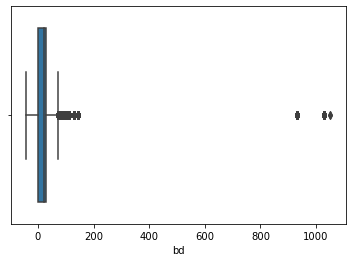

In [20]:
sns.boxplot(data['bd']);

## Treating outliers in bd coloumn

In [21]:
q_low = data['bd'].quantile(0.01)
q_hi  = data['bd'].quantile(0.99)

df_filtered = data[(data['bd'] < q_hi) & (data['bd'] > q_low)]

## Boxplot for Bd Coloumn after removing Outliers

C:\Users\92336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bd'>

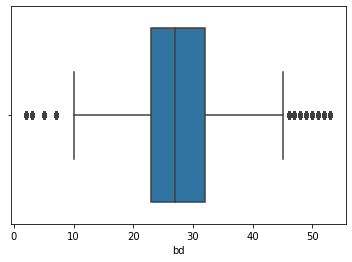

In [22]:
sns.boxplot(df_filtered['bd'])

## Plotting Distribution of target Variable

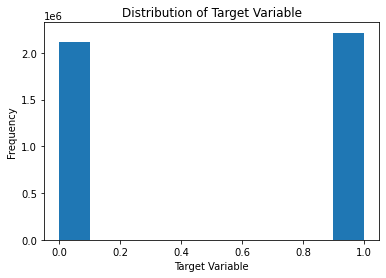

In [23]:
plt.hist(df_filtered['target'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

## Plotting Distribution of Age

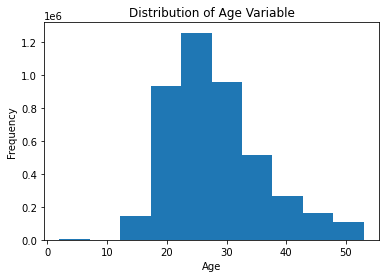

In [24]:
plt.hist(df_filtered['bd'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age Variable')
plt.show()

## plotting distribution of gender

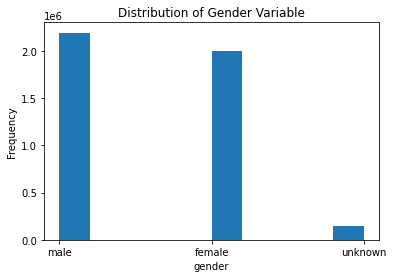

In [25]:
plt.hist(df_filtered['gender'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender Variable')
plt.show()

## Language vs Target

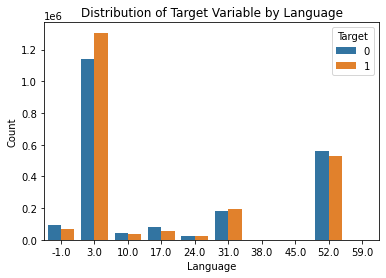

In [26]:
# Plot the count plot of 'language' vs 'target'
sns.countplot(data=df_filtered, x='language', hue='target')
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Distribution of Target Variable by Language')
plt.legend(title='Target')
plt.show()

## Gender vs Target

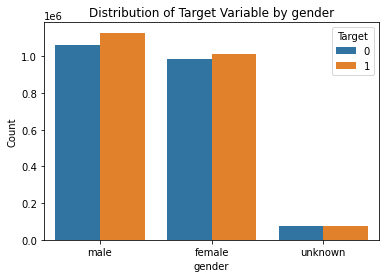

In [27]:
# Plot the count plot of 'gender' vs 'target'
sns.countplot(data=df_filtered, x='gender', hue='target')
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Distribution of Target Variable by gender')
plt.legend(title='Target')
plt.show()

## City vs Target

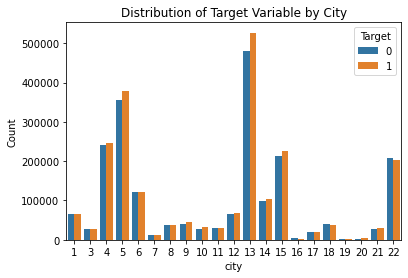

In [28]:
# Plot the count plot of 'city' vs 'target'
sns.countplot(data=df_filtered, x='city', hue='target')
plt.xlabel('city')
plt.ylabel('Count')
plt.title('Distribution of Target Variable by City')
plt.legend(title='Target')
plt.show()

## Artist name vs Target

In [ ]:
# Plot the count plot of 'Artist Name' vs 'target'
sns.countplot(data=df_filtered, x='artist_name', hue='target')
plt.xlabel('artist_name')
plt.ylabel('Count')
plt.title('Distribution of Target Variable by Artist Name')
plt.legend(title='Target')
plt.show()

C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12480 (\N{KATAKANA LETTER DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92

C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20432 (\N{CJK UNIFIED IDEOGRAPH-4FD0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38748 (\N{CJK UNIFIED IDEOGRAPH-975C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65286 (\N{FULLWIDTH AMPERSAND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26107 (\N{CJK UNIFIED IDEOGRAPH-65FB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28009 (\N{CJK UNIFIED IDEOGRAPH-6D69}) missing from current font.
  fig.canvas.print_figure(bytes_io, **k

C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12514 (\N{KATAKANA LETTER MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12511 (\N{KATAKANA LETTER MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 33310 (\N{CJK UNIFIED IDEOGRAPH-821E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23565 (\N{CJK UNIFIED IDEOGRAPH-5C0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27770 (\N{CJK UNIFIED IDEOGRAPH-6C7A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Use

C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20553 (\N{CJK UNIFIED IDEOGRAPH-5049}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 34183 (\N{CJK UNIFIED IDEOGRAPH-8587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35947 (\N{CJK UNIFIED IDEOGRAPH-8C6B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24555 (\N{CJK UNIFIED IDEOGRAPH-5FEB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_

C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30334 (\N{CJK UNIFIED IDEOGRAPH-767E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37995 (\N{CJK UNIFIED IDEOGRAPH-946B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21191 (\N{CJK UNIFIED IDEOGRAPH-52C7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 40723 (\N{CJK UNIFIED IDEOGRAPH-9F13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\92336\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29645 (\N{CJK UNIFIED IDEOGRAPH-73CD}) missing from current font.
  fig.canvas.print_figure(bytes_

## Heatmap

In [ ]:
sns.heatmap(df_filtered.corr(),cmap="magma")


# Building the models
# I will use logistic regression, XGBoost, GradientBoost, RandomForest, LGBM Algortihtms .